In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
#create a dataframe from a file using pandas
file = '../Resources/Capitals.csv'
# The correct encoding must be used to read the CSV in pandas
weather = pd.read_csv(file, encoding="ISO-8859-1")
weather.reset_index(inplace=True)
weather.columns

Index(['index', 'Country', 'Cities', 'Country Code'], dtype='object')

In [3]:
# set up additional columns to hold information
city_name = []
country = []
temp = []
weather['Temperature'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

#print(response['main']['temp'])
# use iterrows to iterate through pandas dataframe
for index, row in weather.iterrows():

    # iterate thru each row of the file
    city = row['Cities']
    url = base_url + "appid=" + "082ff2cde1d396b2b896b2335daad199" + "&q=" + city +"&units=imperial"

# assemble url and make API request
    response = requests.get(url).json()
   
    #update the dataframe 
    try:
        weather.loc[index, 'Temperature'] = response['main']['temp']
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp"])
        print(response['main']['temp'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

53.6
Missing field/result... skipping.
69.82
39.72
80.6
Missing field/result... skipping.
64.47
47.64
64.36
43.05
53.6
30.18
73.9
81.63
33.22
33.8
35.42
75.6
66.2
40.05
66.31
46.4
66.2
82.4
86.58
42.44
86
61.65
91.4
73.4
29.41
69.8
71.6
82.4
64.98
63.81
57.2
36.54
73.4
73.4
89.01
78.44
46.56
72.52
Missing field/result... skipping.
36.23
34
82.4
32.92
79
83.34
53.08
60.33
77.34
33.66
60.39
58.59
28.62
59
Missing field/result... skipping.
87.8
24.1
39.74
77
84.2
75.2
50
34.43
82.4
64.27
34.39
66.2
79.02
76.77
77
Missing field/result... skipping.
73.85
50.92
42.8
85.66
87.15
55.36
68
32.94
Missing field/result... skipping.
45.39
32.09
59.92
47.37
42.8
60.62
Missing field/result... skipping.
Missing field/result... skipping.
69.8
53.6
89.6
31.06
47.77
40.95
77
47.39
43.27
34.25
35.98
48.16
59
65.88
86.94
49.05
86
54.25
86
68
44.49
66.4
50.56
47.46
42.8
48.06
51.37
69.8
Missing field/result... skipping.
60.76
Missing field/result... skipping.
66.2
36.46
60.12
86
86
75.2
55.35
31.89
28.42
84

In [4]:
weather_dict = {
    "City": city_name,
    "Country":country,
    "Temperature": temp,
    }
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Country,Temperature
0,Kabul,AF,53.60
1,Algiers,US,69.82
2,Andorra la Vella,FR,39.72
3,Luanda,AO,80.60
4,Buenos Aires,AR,64.47


In [5]:
weather.to_csv('../Outputs/WeatherbyCity.csv')

In [6]:
happiness = '../Resources/WorldHappinessReport.csv'
happinessReport = pd.read_csv(happiness)

happinessnew = happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()

,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [7]:
happinessnew_2017 = happinessnew[happinessnew['year']== 2017]
happinessnew_2017 = happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()


,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [8]:
DF=pd.merge(weather, happinessnew_2017, on="Country", how='inner',suffixes=("","") )
DF['Temperature'] = pd.to_numeric(DF['Temperature'],errors='coerce')
DF
DF_modified=DF.dropna(how='any')
DF_modified.head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,53.60,2017,2.661718
2,2,Algeria,Algiers,DZ,69.82,2017,5.248912
3,6,Argentina,Buenos Aires,AR,64.47,2017,6.039330
4,7,Armenia,Yerevan,AM,47.64,2017,4.287736
5,8,Australia,Canberra,AU,64.36,2017,7.257038


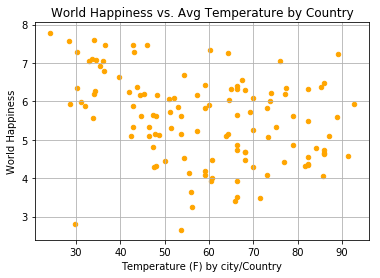

In [9]:
plt.scatter(DF_modified["Temperature"], DF_modified["Life Ladder"], c="orange", marker="o", s=20)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

#save as png
plt.savefig("../Graphs/WeatherHappiness.png")

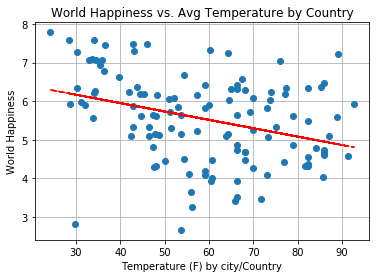

In [10]:
#Regression
slope, intercept, r, p, error = linregress(DF_modified["Temperature"], DF_modified["Life Ladder"])
# slope, intercept, r, p, error


fit = slope * DF_modified["Temperature"] + intercept

fig, ax = plt.subplots()
ax.plot(DF_modified["Temperature"], DF_modified["Life Ladder"],linewidth="0", marker='o') #plot each instance
ax.plot(DF_modified["Temperature"], fit, 'r--') #plot the regresion calc, with a red dotted line

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)
plt.savefig("../Graphs/WeatherHappinessRegression.png")

In [11]:
print(slope, intercept, r, p, error)


-0.021740337897366534 6.820217716018212 -0.3351875247269409 0.00019434157178448088 0.00564945073388418
